<a href="https://colab.research.google.com/github/don-rukshan/Youtube-Video-Classification/blob/master/AS2016525_Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.sjp.ac.lk/wp-content/uploads/2017/11/Emblem_USJP-300x300.png" style="width:128px;height:128px;">

<center><h2>UNIVERSITY OF SRI JAYEWARDENEPURA<br>
Department of Computer Science</h2><br>
<h3>B.Sc. (Hons) in Computer Science<br>
Assignment #02<br>
CSC 375 2.0 – MACHINE LEARNING II</h3></center>

## Index Number:

AS2016525


## Name:

M.D.C. RUKSHAN SURIYAARATCHIE

## Instructions To Candidates:

1.	This assignment contains twenty two (22) tasks. 
2.	The total marks obtainable for this assignment is 100. The marks assigned for each task are included in square brackets.
3.	This assignment accounts for 35% of the module assessment.
4.	Typed your index number and name in the given cells in the Jupyter notebook.
5.	Your answers should be typed in the given empty cells in the Jupyter notebook. Don’t type your answers in a different location in the notebook other than the given location.
6.	Don’t copy answers from your colleagues. In such a case, zero marks will be given to all candidates with the copied answers.
7.  You may refer resources provided under the folder "Labs" to complete this assignment.

## Problem:

The data file “video_data.csv” contains the following details of YouTube videos:
- No of likes
- No of dislikes
- No of subscribers
- No of views

It is needed to design machine learning models to predict the no of views given the no of likes, no of dislikes and no of subscribers.

## Downloading Jupyter notebook and renaming the notebook:

1.	Download a copy of the Jupyter notebook “Assignment02.ipynb”. Rename it as “Your\_Index\_No\_Assignment02.ipynb” where “Your\_Index\_No” is the index number assigned you by the Faculty of Applied Sciences.
2.	Open the Jupyter notebook in “Google CoLab” or “Anaconda.”

## Submission:

- Completed Jupyter notebook (i.e.  Your\_Index\_No\_Assignment02.ipynb) should be uploaded to your “Schoology” account in CSC 375 2.0 Machine Learning II [2019-20].  Sending the notebook in any other alternative methods will not be accepted.
- Before submitting the notebook, verify all contents in cells and results are saved.

## Tasks:

Write required codes in the empty code cell below each task and run them.

### 01. [05 marks] Import the required Python libraries to the notebook.

In [0]:


import io
import pandas as pd
import numpy as np

from google.colab import files

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

Using TensorFlow backend.


### 02.	[05 marks] Read the given data file (video_data.csv) into a Pandas data frame (name it as ‘df’).

In [0]:

uploaded = files.upload()

df = pd.read_csv(io.StringIO(uploaded['video_data.csv'].decode('utf-8')))



Saving video_data.csv to video_data.csv


### 03.	[05 marks] Display the first five data points of the file using the “head()” function.

In [0]:
df.head(5)

,Likes,Dislikes,Subscribers,Views
0,104460,3365,7300000,1988888
1,103203,3570,3300000,2617005
2,22485,612,1800000,932230
3,23077,1337,465000,1165800
4,12315,522,11000000,551165


### 04.	[05 marks] Obtain the descriptive statistics of no of likes, no of dislikes, no of subscribers and no of views.

In [0]:
df.describe()



,Likes,Dislikes,Subscribers,Views
count,3.364000e+03,3.364000e+03,3.364000e+03,3.364000e+03
mean,1.298265e+05,1.177348e+04,2.486401e+06,2.110672e+07
std,5.845796e+05,1.857651e+05,5.676479e+06,1.143878e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
25%,5.850000e+02,2.800000e+01,4.600000e+04,3.831525e+04
50%,5.535000e+03,2.205000e+02,3.910000e+05,4.493690e+05
75%,4.092750e+04,2.059000e+03,1.800000e+06,4.022392e+06
max,1.024205e+07,9.653039e+06,7.100000e+07,2.668027e+09


### 05.	[05 marks] Draw three (03) separate scatter plots that show the no of views against the no of likes, no of dislikes and no of subscribers.

Codes (Plot 1 -  No of views Vs. No of likes)

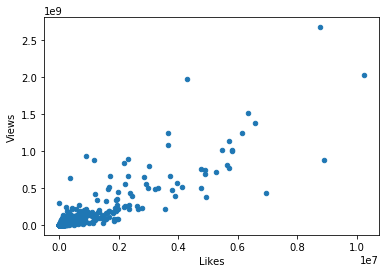

In [0]:

df.plot.scatter(y='Views', x='Likes')


Codes (Plot 2 - No of views Vs. No of dislikes)

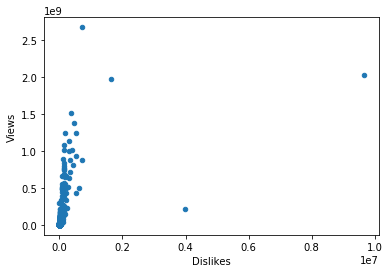

In [0]:
df.plot.scatter(y='Views', x='Dislikes')

Codes (Plot 3 -  No of views Vs. No of subscribers)

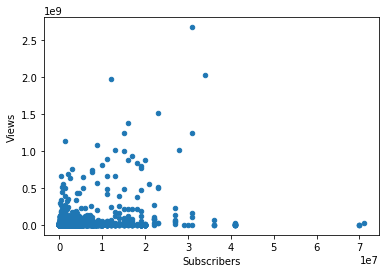

In [0]:
df.plot.scatter(y='Views', x='Subscribers')

### 06.	[05 marks] Split the dataset into two datasets for the training and testing. Use 80% for training and the remaining for the testing.

In [0]:
#y = df.Views
#y = np.array(df['Views'])
y = df.drop(['Likes','Dislikes','Subscribers'],axis=1)
X = df.drop('Views',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)



### 07.	[05 marks] Scale X data (no of likes, no of dislikes and no of subscribers) of the training dataset to mean 0 and standard deviation 1. Apply the same transformation to X data of the testing dataset.

In [0]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
X_test_scaled = scaler.fit_transform(X_test.astype(float))


### 08.	[05 marks] Design a linear regression model (name it as “model_reg”) using the training dataset. Use “Keras” Python library to design this model. Print a summary of the model that shows Layer, Output Shape, Number of parameters, etc.

<b><u>Note:</u></b> Add “\_reg” suffix to each variable you define for the regression model as in “model\_reg” here after.

In [0]:
#model_reg = LinearRegression()
model_reg = Sequential()
model_reg.add(Dense(1, input_dim=3, activation='linear'))
model_reg.summary()

_reg = model_reg





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


### 09.	[05 marks] Compile the model. Use “Adam” optimizer (instead of SGD) with the learning rate 10,000 and loss as mean squared error.

In [0]:
OPTIMIZER = Adam(lr=10000)
_reg.compile(optimizer=OPTIMIZER, loss='mean_squared_error',metrics=['accuracy'])

### 10.	[05 marks] Fit the model using the training dataset. Use batch size as 32, no of epochs as 1000 and verbose as 1.

In [0]:
_reg_history = _reg.fit(x=X_train_scaled, y=y_train, batch_size=32, epochs=1000, verbose=1)




Epoch 1/1000





2691/2691 [==============================] - 1s 206us/step - loss: 14299523734444462.0000 - acc: 0.0000e+00
Epoch 2/1000
2691/2691 [==============================] - 0s 27us/step - loss: 14167269790715704.0000 - acc: 0.0000e+00
Epoch 3/1000
2691/2691 [==============================] - 0s 31us/step - loss: 14045690205506776.0000 - acc: 0.0000e+00
Epoch 4/1000
2691/2691 [==============================] - 0s 31us/step - loss: 13922833042385420.0000 - acc: 0.0000e+00
Epoch 5/1000
2691/2691 [==============================] - 0s 32us/step - loss: 13800346207611994.0000 - acc: 0.0000e+00
Epoch 6/1000
2691/2691 [==============================] - 0s 30us/step - loss: 13680417507017300.0000 - acc: 0.0000e+00
Epoch 7/1000
2691/2691 [==============================] - 0s 29us/step - loss: 13555594019037278.0000 - acc: 0.0000e+00
Epoch 8/1000
2691/2691 [==============================] - 0s 30us/step - loss: 13437434734537332.0000 - acc: 0.0000e+00
Epoch 9/1000
2691/2691 [=======

### 11.	[03 marks] Plot the loss of the training process against the epochs.

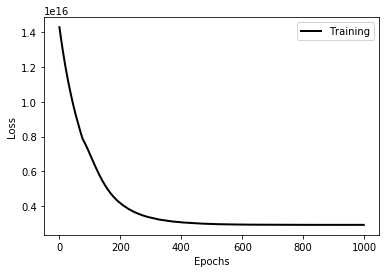

In [0]:
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'] , color='black', lw=2)
    plt.legend(['Training'])

plot_history(_reg_history)

### 12.	[03 marks] Find the predicted no of views for the training and testing datasets.

In [0]:
y_train_pred = _reg.predict(X_train_scaled)
print(y_train_pred)

y_test_pred = _reg.predict(X_test_scaled)
print(y_test_pred)


[[-9.3445400e+05]
 [-8.2779800e+05]
 [ 2.7096995e+08]
 ...
 [ 4.6670600e+05]
 [ 7.9585872e+07]
 [-8.1558400e+05]]
[[ 5.42367400e+06]
 [-5.63896400e+06]
 [ 9.74210700e+06]
 [-3.75549400e+06]
 [-4.15832200e+06]
 [ 1.34955370e+07]
 [-4.90322800e+06]
 [-5.87594000e+06]
 [-4.38366400e+06]
 [-5.67994800e+06]
 [-5.56711400e+06]
 [ 2.26119200e+06]
 [-5.85760000e+06]
 [ 7.55614336e+08]
 [-5.35255600e+06]
 [-5.79935400e+06]
 [-5.87174800e+06]
 [-4.58850800e+06]
 [-5.42875800e+06]
 [-5.69673600e+06]
 [-1.88986600e+06]
 [-5.88548800e+06]
 [-5.09384600e+06]
 [-5.78724600e+06]
 [-3.78453000e+06]
 [-5.89673200e+06]
 [-5.90341600e+06]
 [-5.83162000e+06]
 [-3.79636200e+06]
 [-1.31013800e+06]
 [-5.70146600e+06]
 [-5.30426000e+05]
 [-5.10315200e+06]
 [ 2.80888480e+08]
 [-5.39131200e+06]
 [-5.80109400e+06]
 [ 1.21076700e+07]
 [ 8.61368480e+07]
 [-5.89625200e+06]
 [-5.44170800e+06]
 [-5.74573000e+06]
 [-6.67730000e+05]
 [ 2.92519460e+07]
 [-5.81728600e+06]
 [ 1.40214200e+06]
 [ 1.89510600e+07]
 [-5.7077360

### 	13. [05 marks] Draw two (02) scatter plots that show the predicted no of views against the original no of views for the training and testing datasets. Note that if your predicted values are closer to the original values, points of the plot scatter around the line $y=x$.

Codes (Plot 1 - Predicted no of views Vs. Original no of views for the training dataset)

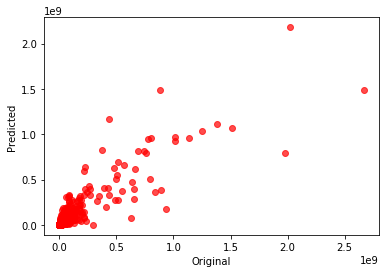

In [0]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_train_pred, color = 'red' , alpha = 0.7)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

Codes (Plot 2 - Predicted no of views Vs. Original no of views for the testing dataset)

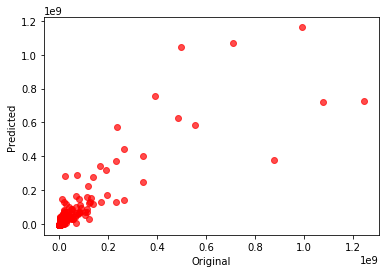

In [0]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred , color = 'red' , alpha = 0.7)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

### 	14. [05 marks] Compute the $R^2$ values for these predicted no of views and original no of views for both training and testing datasets. Note that if your model is perfectly fitted, $R^2$ values should be close to 1.

In [0]:
print('Mean Squared Error for train:', r2_score(y_train, y_train_pred))
print('Mean Squared Error for test:', r2_score(y_test, y_test_pred))


Mean Squared Error for train: 0.7911253021247298
Mean Squared Error for test: 0.7277877841510272


### 15.	[05 marks] Design a neural network (name it as “model_dnn”) with 4 hidden layers, each layer contains 13 neurons. Use the “relu” activation function in the input and hidden layers. Print a summary of the model that shows Layer, Output Shape, Number of parameters, etc. 

<b><u>Note:</u></b> Add “\_dnn” suffix to each variable you define for the deep neural network model as in ‘model\_dnn’ here after.

In [0]:
model_dnn = Sequential()
model_dnn.add(Dense(13, input_dim=3, kernel_initializer='normal', activation='relu'))
model_dnn.add(Dense(13, kernel_initializer='normal', activation='relu'))
model_dnn.add(Dense(13, kernel_initializer='normal', activation='relu'))
model_dnn.add(Dense(13, kernel_initializer='normal', activation='relu'))
model_dnn.add(Dense(1, kernel_initializer='normal'))
model_dnn.summary()

_dnn = model_dnn


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 13)                52        
_________________________________________________________________
dense_8 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_9 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_10 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 14        
Total params: 612
Trainable params: 612
Non-trainable params: 0
_________________________________________________________________


### 16.	[05 marks] Compile the model. Use “Adam” optimizer (instead of SGD) with the learning rate 0.003 and loss as mean squared error.

In [0]:
OPTIMIZER = Adam(lr=0.003)
_dnn.compile(optimizer=OPTIMIZER, loss='mean_squared_error' , metrics=['accuracy'])

### 17.	[05 marks] Fit the model using the training dataset. Use batch size as 32, no of epochs as 1000 and verbose as 1.

In [0]:
_dnn_history = _dnn.fit(x=X_train_scaled, y=y_train, batch_size=32, epochs=1000, verbose=1)

Epoch 1/1000
2691/2691 [==============================] - 0s 166us/step - loss: 14351148090108806.0000 - acc: 0.0000e+00
Epoch 2/1000
2691/2691 [==============================] - 0s 37us/step - loss: 14351144346836856.0000 - acc: 0.0000e+00
Epoch 3/1000
2691/2691 [==============================] - 0s 43us/step - loss: 14351116401626758.0000 - acc: 0.0000e+00
Epoch 4/1000
2691/2691 [==============================] - 0s 38us/step - loss: 14350985154424750.0000 - acc: 0.0000e+00
Epoch 5/1000
2691/2691 [==============================] - 0s 48us/step - loss: 14350599664264138.0000 - acc: 0.0000e+00
Epoch 6/1000
2691/2691 [==============================] - 0s 40us/step - loss: 14349741934477932.0000 - acc: 0.0000e+00
Epoch 7/1000
2691/2691 [==============================] - 0s 41us/step - loss: 14347810554384172.0000 - acc: 0.0000e+00
Epoch 8/1000
2691/2691 [==============================] - 0s 38us/step - loss: 14344033769269834.0000 - acc: 0.0000e+00
Epoch 9/1000
2691/2691 [===============

### 18.	[02 marks] Plot the loss of the training process against the epochs.

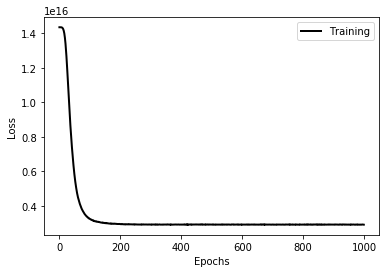

In [0]:
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'], color='black', lw=2)
    plt.legend(['Training'])


plot_history(_dnn_history)

### 19.	[02 marks] Find the predicted no of views for the training and testing datasets.

In [0]:
y_train_pred_dnn = _dnn.predict(X_train_scaled)
print (y_train_pred_dnn)

y_test_pred_dnn = _dnn.predict(X_test_scaled)
print (y_test_pred_dnn)

[[5.1899159e+05]
 [5.9803269e+05]
 [2.6693418e+08]
 ...
 [1.3956249e+06]
 [7.3937624e+07]
 [6.0486656e+05]]
[[4.66303000e+06]
 [2.01150406e+05]
 [7.69579950e+06]
 [2.26082016e+05]
 [2.01150250e+05]
 [1.01962560e+07]
 [2.01151531e+05]
 [2.01146953e+05]
 [2.01144875e+05]
 [2.01151719e+05]
 [2.01150812e+05]
 [2.62621000e+06]
 [2.01151859e+05]
 [7.58334848e+08]
 [2.01151203e+05]
 [2.01144875e+05]
 [2.01152031e+05]
 [2.01151312e+05]
 [2.01151750e+05]
 [2.01151469e+05]
 [3.88843219e+05]
 [2.01151984e+05]
 [2.01151625e+05]
 [2.01144875e+05]
 [2.01144875e+05]
 [2.01148797e+05]
 [2.01151969e+05]
 [2.01144875e+05]
 [2.26727391e+05]
 [4.38576875e+05]
 [2.01151453e+05]
 [7.86225250e+05]
 [2.01144875e+05]
 [2.79220416e+08]
 [2.01144875e+05]
 [2.01149859e+05]
 [9.00984100e+06]
 [7.95482400e+07]
 [2.01150797e+05]
 [2.01151531e+05]
 [2.01149156e+05]
 [5.03774219e+05]
 [2.37387200e+07]
 [2.01144875e+05]
 [2.05979162e+06]
 [1.40256660e+07]
 [2.01151891e+05]
 [7.35669650e+06]
 [2.01150562e+05]
 [2.011505

### 20. [05 marks] Draw two (02) scatter plots that show the predicted no of views against the original no of views for the training and testing datasets. Note that if your predicted values are closer to the original values, points of the plot scatter around the line $y=x$.

Codes (Plot 1 - Predicted no of views Vs. Original no of views for the training dataset)

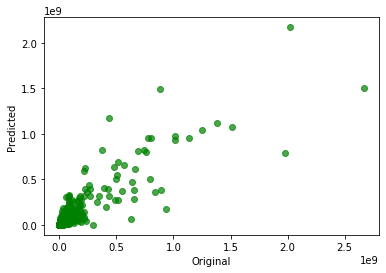

In [0]:
fig, ax1 = plt.subplots()
ax1.scatter(y_train, y_train_pred_dnn, alpha=0.7 , color = 'green')
ax1.set_xlabel('Original')
ax1.set_ylabel('Predicted')
plt.show()



Codes (Plot 2 - Predicted no of views Vs. Original no of views for the testing dataset)

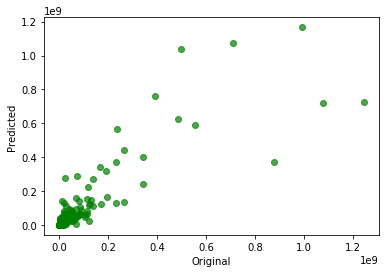

In [0]:
fig, ax2 = plt.subplots()
ax2.scatter(y_test, y_test_pred_dnn,alpha=0.7 , color = 'green')
ax2.set_xlabel('Original')
ax2.set_ylabel('Predicted')
plt.show()

### 21. [05 marks] Compute the $R^2$ values for these predicted no of views and original no of views for both training and testing datasets. Note that if your model is perfectly fitted, $R^2$ values should be close to 1.

In [0]:
print('Mean Squared Error for train:', r2_score(y_train, y_train_pred_dnn))
print('Mean Squared Error for test:', r2_score(y_test, y_test_pred_dnn))

Mean Squared Error for train: 0.7915256681385283
Mean Squared Error for test: 0.7308368368926269


### 22.	[05 marks] Discuss the results obtained from two models and explain which model is more appropriate for the problem.

When using the linear regression model,the scatter plot loss of the training process against the epochs shows higher losses than neural network model because in the linear regression model it takes more than 200 epochs to make the loss lower and in the neural network model loss becomes lower before the 200 epochs. 

R-squred in neural network model is more close to 1 than linear regression model therefore it is the most fitted method.

So the best process is the **neural network method**.







<center><h2>---END---</h2></center>